In [1]:
# Importing EdgeSimPy components and its built-in libraries (NetworkX and MessagePack)
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
from typing import cast

from edge_sim_py.components import *
from edge_sim_py.dataset_generator.map import hexagonal_grid
from edge_sim_py.dataset_generator.network_switches import sample_switch
from edge_sim_py.dataset_generator.network_topologies import partially_connected_hexagonal_mesh
from plot_topology import plot_topology
from conftest import _servers_base_station, _services_processing, reset_components

In [2]:
def plot_small_app_1_user_4_services():
    map_coordinates = hexagonal_grid(x_size=3, y_size=3)

    for coordinates in map_coordinates:

        base_station = BaseStation()
        base_station.wireless_delay = 0
        base_station.coordinates = coordinates

        network_switch = sample_switch()
        base_station._connect_to_network_switch(network_switch=network_switch)

    partially_connected_hexagonal_mesh(
        network_nodes=NetworkSwitch.all(),
        link_specifications=[
            {"number_of_objects": 16, "delay": 1, "bandwidth": 10},
        ],
    )

    # Creating the Edge Server
    _servers_base_station(number_of_servers=4)

    # Creating the services
    services = _services_processing(number_of_services=4)

    # Assigning the services to the edge servers
    for server, service in zip(EdgeServer.all(), services):
        server.services.append(service)
        service.server = server

    # Creating the user
    user = User()
    user.set_packet_size_strategy(mode="fixed", size=20)
    user._set_initial_position(coordinates=(0, 0))

    # Creating the application
    app = Application()
    for service in services:
        app.connect_to_service(service=service)

    user._connect_to_application(app=app, delay_sla=10)

    CircularDurationAndIntervalAccessPattern(user=user, app=app, start=1, duration_values=[1], interval_values=[1])

    plot_topology()

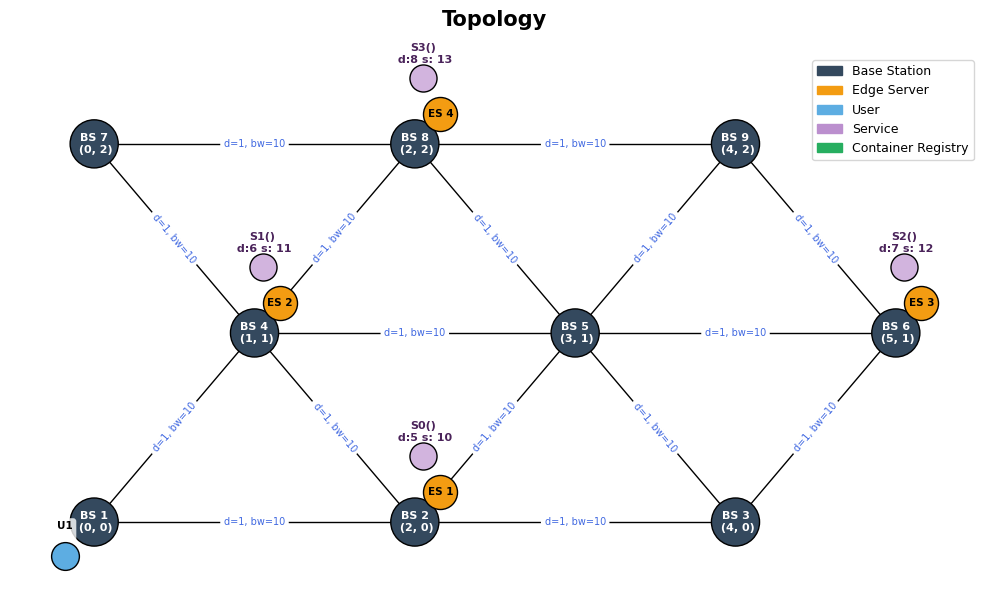

In [3]:
reset_components()
plot_small_app_1_user_4_services()